In [2]:
print("Hello World")

Hello World


In [3]:
import numpy as np
import qiskit
from qiskit import *

In [7]:
def initializer(x,y):
    if (x or y) >= 8:
        raise ValueError("Make it less than 15")
    else:
        aux_circ=QuantumCircuit(15)
        for i in range (0,3):
            if int(((3-len(bin(x)[2:]))*'0'+bin(x)[2:])[i]) == 1:
                aux_circ.x(int(5*i))
            else:
                pass
        for j in range (0,3):
            if int(((3-len(bin(y)[2:]))*'0'+bin(y)[2:])[j]) == 1:
                aux_circ.x(int(5*j+1))
            else:
                pass
        
        
        return aux_circ
        
def max_stat(a,b):
    if a > b:
        return 'a>b ==> 01'
    elif a == b:
        return 'a=b ==> 00'
    else:
        return 'a<b ==> 10'



        

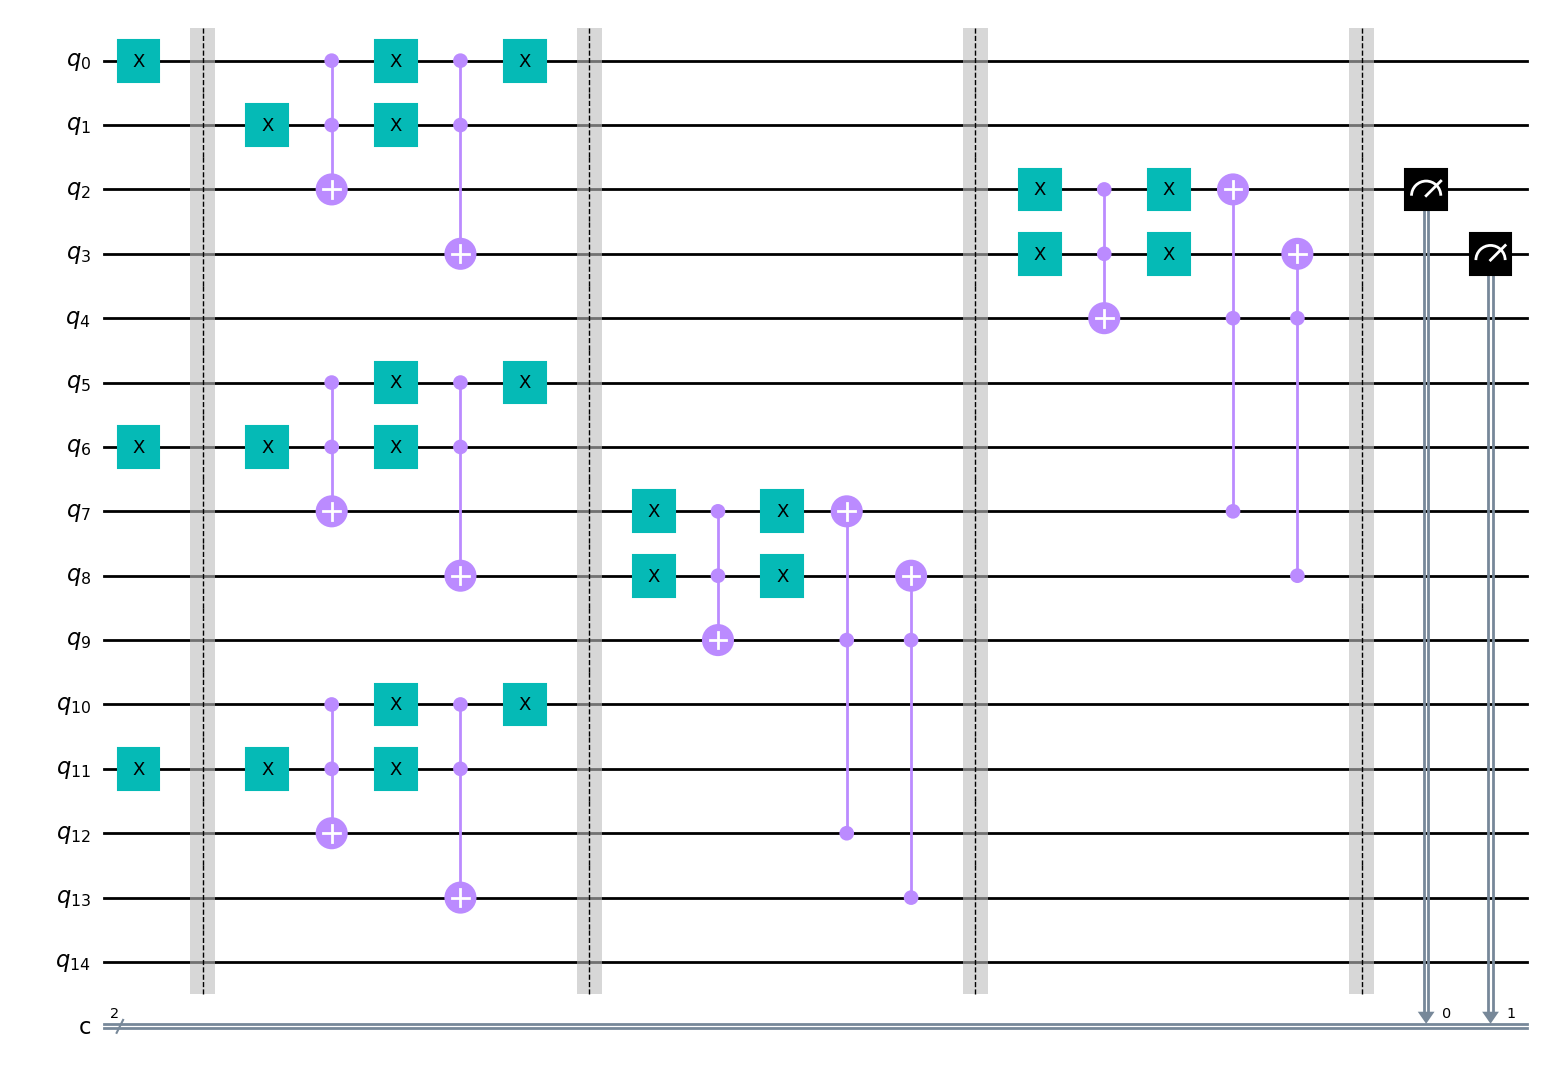

In [8]:
# Build a sub-circuit
sub_q = QuantumRegister(4)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.x(sub_q[1])
sub_circ.ccx(sub_q[0], sub_q[1],sub_q[2])
sub_circ.x(sub_q[0])
sub_circ.x(sub_q[1])
sub_circ.ccx(sub_q[0], sub_q[1],sub_q[3])
sub_circ.x(sub_q[0])

sub_q2 = QuantumRegister(5)
sub_circ2 = QuantumCircuit(sub_q2, name='aux-gates')
sub_circ2.x(0)
sub_circ2.x(1)
sub_circ2.ccx(0,1,2)
sub_circ2.x(0)
sub_circ2.x(1)
sub_circ2.ccx(2,3,0)
sub_circ2.ccx(2,4,1)

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()
sub_inst2 = sub_circ2.to_instruction()



qr = QuantumRegister(15, 'q')
cr = ClassicalRegister(2, 'c')
circ = QuantumCircuit(qr,cr)

# Initialize the circuit for a certain bitstring
initial_state=initializer(a,b)

# The rest of circuit does not change
circ.append(initial_state.to_instruction(), [i for i in range(0,15)])
circ.barrier()
circ.append(sub_inst,[0,1,2,3])
circ.append(sub_inst, [5,6,7,8])
circ.append(sub_inst, [10,11,12,13])
circ.barrier()
circ.append(sub_inst2,[7,8,9,12,13])
circ.barrier()
circ.append(sub_inst2,[2,3,4,7,8])
circ.barrier()
circ.measure(2,0)
circ.measure(3,1)
circ=circ.decompose()
circ.draw('mpl')


In [6]:
# Build a sub-circuit
sub_q = QuantumRegister(4)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.x(sub_q[1])
sub_circ.ccx(sub_q[0], sub_q[1],sub_q[2])
sub_circ.x(sub_q[0])
sub_circ.x(sub_q[1])
sub_circ.ccx(sub_q[0], sub_q[1],sub_q[3])
sub_circ.x(sub_q[0])

sub_q2 = QuantumRegister(5)
sub_circ2 = QuantumCircuit(sub_q2, name='aux-gates')
sub_circ2.x(0)
sub_circ2.x(1)
sub_circ2.ccx(0,1,2)
sub_circ2.x(0)
sub_circ2.x(1)
sub_circ2.ccx(2,3,0)
sub_circ2.ccx(2,4,1)

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()
sub_inst2 = sub_circ2.to_instruction()


a=4
b=3

print("a = ",a,"b = ",b)
print("If a>b, you should get 01 \nIf a<b, you should get 10")
print("If a=b, you should get 00")
print("In this instance, we have " + max_stat(a,b))

qr = QuantumRegister(15, 'q')
cr = ClassicalRegister(2, 'c')
circ = QuantumCircuit(qr,cr)

# Initialize the circuit for a certain bitstring
initial_state=initializer(a,b)

# The rest of circuit does not change
circ.append(initial_state.to_instruction(), [i for i in range(0,15)])
circ.barrier()
circ.append(sub_inst,[0,1,2,3])
circ.append(sub_inst, [5,6,7,8])
circ.append(sub_inst, [10,11,12,13])
circ.barrier()
circ.append(sub_inst2,[7,8,9,12,13])
circ.barrier()
circ.append(sub_inst2,[2,3,4,7,8])
circ.barrier()
circ.measure(2,0)
circ.measure(3,1)


backend_sim = Aer.get_backend("qasm_simulator")
job_sim = backend_sim.run(transpile(circ,backend_sim), shots='10000')
result_sim = job_sim.result()
counts = result_sim.get_counts()
print("The predicted result from the quantum circuit is ==>",counts)


a =  4 b =  3
If a>b, you should get 01 
If a<b, you should get 10
If a=b, you should get 00
In this instance, we have a>b ==> 01
The predicted result from the quantum circuit is ==> {'01': 10000}


In [10]:
import numpy as np

A = np.zeros(shape=(4,4))
for i in range(0,4):
    for j in range(0,4):
        A[i][j]=1/(1+i+j)
print(A)
np.linalg.det(A)      

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


1.6534391534390412e-07